In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Example on Real-World Network</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from utils import viz
from utils import io

<h2>Parameters</h2>

In [3]:
sampling = "nodes"              # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
pseeds = 0.9                    # fraction of nodes to sample 
epoch = 1                       # epoch (iteration number #)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
IGNORE = 0                      # IGNORE class value
DATASETS = {'caltech':'Caltech36',
            'swarthmore':'Swarthmore42',
            'usf':'USF51-2009',
            'wikipedia':'Wikipedia'}
dataset = 'usf'
DATAFN = "../data/{}.gpickle".format(DATASETS[dataset])   # networkx graph file path
OUTPUT = "../results-individual"                         # directory to store results

<h2>1. Network</h2>

In [4]:
net = Network()
net.load(DATAFN, IGNORE)
net.info()

Name: USF51
Type: Graph
Number of nodes: 1705
Number of edges: 15597
Average degree:  18.2956
{'n': 1705, 'ignoreInt': 0, 'i': None, 'H': 0.3491504266836932, 'kind': None, 'km': 17.596516690856312, 'N': 1705, 'group': ['M', 'm'], 'class': 'gender', 'h': 0.5, 'name': 'USF51', 'kM': 18.769685039370078, 'density': 0.010736855148486225, 'm': 1, 'labels': [1, 2], 'k': 18.29560117302053, 'fullname': 'USF51-2009', 'min_degree': 1, 'x': None, 'b': 0.40410557184750734, 'e': 15597, 'attributes': ['status', 'gender', 'major', '2major', 'dorm', 'year', 'highschool'], 'B': 0.40410557184750734}


<h2>2. Sampling</h2>

In [5]:
sam = Sampling(sampling, net.G, pseeds, epoch)
sam.extract_subgraph()
sam.info()

Name: USF51
Type: Graph
Number of nodes: 1534
Number of edges: 12526
Average degree:  16.3312
{'ignoreInt': 0, 'i': None, 'H': 0.36043410991625613, 'kind': None, 'km': 15.834405144694534, 'N': 1534, 'group': ['M', 'm'], 'class': 'gender', 'h': 0.5, 'name': 'USF51', 'kM': 16.669956140350877, 'density': 0.01065307264517852, 'pseeds': 0.9, 'm': 0, 'labels': [1, 2], 'k': 16.331160365058672, 'fullname': 'USF51-2009', 'epoch': 1, 'x': None, 'method': 'nodes', 'e': 12526, 'attributes': ['status', 'gender', 'major', '2major', 'dorm', 'year', 'highschool'], 'B': 0.40547588005215124}


<h2>3. Modeling</h2>

In [6]:
local_model = Local(LC)
local_model.learn(sam.Gseeds)
local_model.info()

1    0.594401
2    0.405599
dtype: float64


In [7]:
relational_model = Relational(RC).get_model()
relational_model.learn(sam.Gseeds)
relational_model.info()

          1         2
1  0.549359  0.450641
2  0.695564  0.304436


<h2>4. Inference</h2>

In [8]:
inference = Inference(CI)
inference.predict(net.G, local_model, relational_model)
inference.evaluation()
inference.summary()
inference.save(OUTPUT)

(0, 1, 1, 0, 0)
(0, 0, 0, 0, 1)
(0.044612683276661194, 0.29924266168544195, 0.4609550137723381, 0.3000965344809445, 0.3685532239243122)

Prediction in 281.28270053863525 seconds
ROCAUC: 0.7140499425947188
ROCAUC curve: 0.7140499425947188
MAE: 0.4327485380116959
ccm: 0.5373134328358209
ccM: 0.5865384615384616
bias: 0.4780998595326268

USF51-2009_nodes creating...
USF51-2009_nodes created!
USF51-2009_nodes/P90_graph.gpickle saved!
USF51-2009_nodes/P90_samplegraph.gpickle saved!
USF51-2009_nodes/P90_evaluation.pickle saved!


<h2>5. Results</h2>

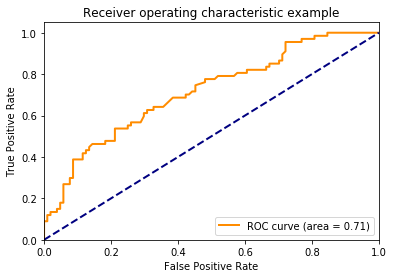

In [9]:
fn = None
viz.plot_rocauc_curve(inference.fpr, inference.tpr, inference.rocauc_curve, fn)